TensorFlow Version: 2.19.0

Loading IMDB dataset...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training sequences: 25000
Test sequences: 25000
Padding sequences to length 500...
Train data shape after padding: (25000, 500)
Test data shape after padding: (25000, 500)

Building LSTM Model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Starting model training...
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 185s 292ms/step - accuracy: 0.4993 - loss: 0.6944 - val_accuracy: 0.5040 - val_loss: 0.6932
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 193s 308ms/step - accuracy: 0.5044 - loss: 0.6916 - val_accuracy: 0.5064 - val_loss: 0.6959
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 183s 293ms/step - accuracy: 0.5265 - loss: 0.6750 - val_accuracy: 0.5100 - val_loss: 0.6975
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 193s 310ms/step - accuracy: 0.5450 - loss: 0.6530 - val_accuracy: 0.5128 - val_loss: 0.7263
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 183s 292ms/step - accuracy: 0.5463 - loss: 0.6401 - val_accuracy: 0.5018 - val_loss: 0.7426
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 182s 292ms/step - accuracy: 0.5396 - loss: 0.6354 - val_accuracy: 0.5036 - val_loss: 0.7699
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 211s 306ms/step - accuracy: 0.5399 - loss: 0.6351 - val_accuracy: 0.5082 - val_loss: 0.7662
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 192s 306

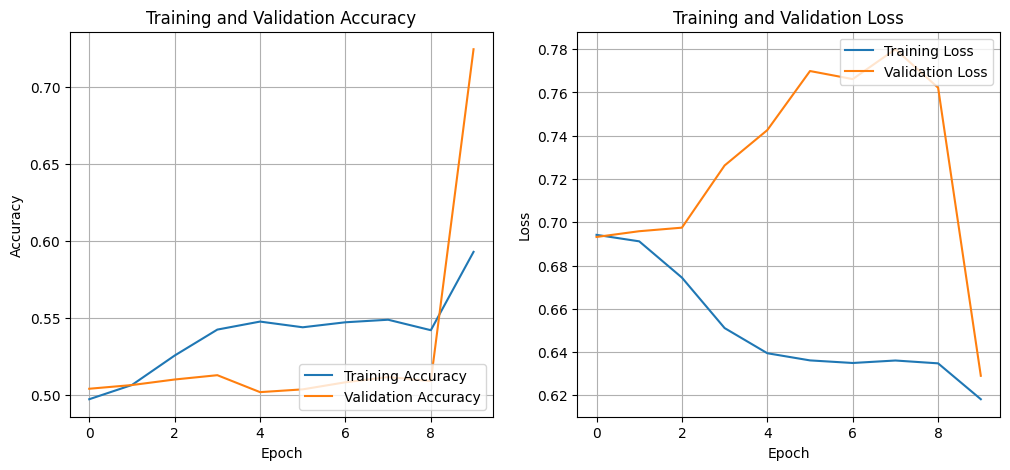

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step

Review: 'This movie was absolutely brilliant, the acting was phenomenal and the story kept me hooked until the very end. A masterpiece!'
Prediction Score: 0.5671 -> Sentiment: Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step



Review: 'Terrible script and awful pacing. The main actor looked bored. I regret wasting my time on this.'
Prediction Score: 0.3133 -> Sentiment: Negative

Model saved to 'imdb_lstm_model.h5'


In [2]:

"""
# IMDB Movie Review Sentiment Analysis using LSTM
This script implements a Recurrent Neural Network (RNN) with a Long Short-Term Memory (LSTM) layer
to classify movie reviews from the IMDB dataset as either positive or negative.


"""

# --- 1. Setup and Imports ---
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt

# Set logging level to avoid excessive TensorFlow warnings
tf.get_logger().setLevel('ERROR')

# --- 2. Hyperparameters ---
# The maximum number of words to consider as features (vocabulary size)
MAX_FEATURES = 10000
# The maximum length of each review (sequences longer than this will be truncated, shorter padded)
MAX_LEN = 500
# Size of the word vector space
EMBEDDING_DIM = 128
# Number of LSTM units
LSTM_UNITS = 64
# Batch size for training
BATCH_SIZE = 32
# Number of epochs for training
EPOCHS = 10

print(f"TensorFlow Version: {tf.__version__}")

# --- 3. Load and Preprocess Data ---

# Load the IMDB dataset, restricting to the top MAX_FEATURES words
print("\nLoading IMDB dataset...")
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=MAX_FEATURES)

print(f"Training sequences: {len(x_train)}")
print(f"Test sequences: {len(x_test)}")

# Pad sequences to a fixed length (MAX_LEN)
# 'post' padding means padding zeros at the end of the sequence
print(f"Padding sequences to length {MAX_LEN}...")
x_train = pad_sequences(x_train, maxlen=MAX_LEN, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=MAX_LEN, padding='post', truncating='post')

print(f"Train data shape after padding: {x_train.shape}")
print(f"Test data shape after padding: {x_test.shape}")

# --- 4. Define the LSTM Model Architecture ---

print("\nBuilding LSTM Model...")
model = Sequential()

# Embedding layer: Converts word indices into dense vectors of fixed size (EMBEDDING_DIM)
model.add(Embedding(input_dim=MAX_FEATURES,
                    output_dim=EMBEDDING_DIM,
                    input_length=MAX_LEN))

# LSTM layer: The core recurrent layer for capturing sequence dependencies.
# Set return_sequences=False as we are doing classification, only the final state is needed.
model.add(LSTM(LSTM_UNITS))

# Dropout layer for regularization
model.add(Dropout(0.5))

# Output Dense layer: Single unit with sigmoid activation for binary classification (positive/negative)
model.add(Dense(1, activation='sigmoid'))

# Print model summary
model.summary()

# --- 5. Compile and Train the Model ---

# Use Adam optimizer and binary crossentropy for binary classification
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

print("\nStarting model training...")

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2, # Use 20% of training data for validation
    verbose=1
)

print("Training finished.")

# --- 6. Evaluate the Model ---

print("\nEvaluating model on test data...")
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# --- 7. Plotting Results ---

# Function to plot training history
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.grid(True)

    plt.show()

plot_history(history)

# --- 8. Example Prediction (Optional - for Colab interactivity) ---

# Get the word index for mapping back to text (optional for real-world testing)
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Function to encode and preprocess a new review
def preprocess_review(text, max_len=MAX_LEN):
    # Split text into words, convert to lowercase
    words = text.lower().split()
    # Convert words to integers, using 1 for <START>, 2 for <UNK>, and 3 for word padding offset
    encoded_review = [word_index.get(word, 2) + 3 for word in words]
    # Add <START> token (which is index 1 but we offset by 3, so index 4)
    encoded_review = [1] + encoded_review
    # Pad the sequence
    padded_review = pad_sequences([encoded_review], maxlen=max_len, padding='post', truncating='post')
    return padded_review

# Test with a positive-sounding review
positive_review = "This movie was absolutely brilliant, the acting was phenomenal and the story kept me hooked until the very end. A masterpiece!"
padded_pos = preprocess_review(positive_review)
prediction_pos = model.predict(padded_pos)[0]
sentiment_pos = "Positive" if prediction_pos > 0.5 else "Negative"

print(f"\nReview: '{positive_review}'")
print(f"Prediction Score: {prediction_pos[0]:.4f} -> Sentiment: {sentiment_pos}")

# Test with a negative-sounding review
negative_review = "Terrible script and awful pacing. The main actor looked bored. I regret wasting my time on this."
padded_neg = preprocess_review(negative_review)
prediction_neg = model.predict(padded_neg)[0]
sentiment_neg = "Positive" if prediction_neg > 0.5 else "Negative"

print(f"\nReview: '{negative_review}'")
print(f"Prediction Score: {prediction_neg[0]:.4f} -> Sentiment: {sentiment_neg}")

# Save the trained model
model.save('imdb_lstm_model.h5')
print("\nModel saved to 'imdb_lstm_model.h5'")

# NOTE: In a Colab environment, this .py content should be copied into a single cell
# and executed. The results will include the model summary, training output,
# evaluation metrics, and the performance plots.